In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
population = pd.read_csv('data/covid_county_population_usafacts.csv', usecols= ['State', 'population'])

population = population[population.State != 0]

population = population.set_index('State')
population

,population
State,
AL,0
AL,55869
AL,223234
AL,24686
AL,22394
...,...
WY,42343
WY,23464
WY,20226


In [3]:
confirmed = pd.read_csv('data/covid_confirmed_usafacts.csv')
confirmed = confirmed.drop(confirmed.iloc[:, 4 : 864], axis=1)
confirmed = confirmed.drop(confirmed.iloc[:, 219 : 235], axis=1)

# Calculating the difference to get the new cases
for i in range (5, len(confirmed.columns)):
    diff = confirmed[confirmed.columns[i]] - confirmed[confirmed.columns[i - 1]]
    confirmed[f'new_cases {confirmed.columns[i]}'] = diff

confirmed = confirmed.drop(confirmed.iloc[:, 4:219], axis= 1)
temp = {}
j = ((len(confirmed.columns) - 4) % 7) - 1

length = len(confirmed.columns) - 3
for i in range(4, len(confirmed.columns), 7):
    if (length) < (i + 7) :
        confirmed[f'{confirmed.columns[i]} - {confirmed.columns[i + j]} Sum'] = confirmed[confirmed.columns[i:i + j]].sum(axis=1)
        confirmed[f'{confirmed.columns[i]} - {confirmed.columns[i + j]} Mean'] = confirmed[confirmed.columns[i:i + j]].mean(axis=1).round()
        confirmed[f'{confirmed.columns[i]} - {confirmed.columns[i + j]} Median'] = confirmed[confirmed.columns[i:i + j]].median(axis=1).round()
        confirmed[f'{confirmed.columns[i]} - {confirmed.columns[i + j]} Mode'] = confirmed[confirmed.columns[i:i + j]].mode(axis=1)[0]
    else:
        confirmed[f'{confirmed.columns[i]} - {confirmed.columns[i + 7]} Sum'] = confirmed[confirmed.columns[i:i + 7]].sum(axis=1)
        confirmed[f'{confirmed.columns[i]} - {confirmed.columns[i + 7]} Mean'] = confirmed[confirmed.columns[i:i + 7]].mean(axis=1).round()
        confirmed[f'{confirmed.columns[i]} - {confirmed.columns[i + 7]} Median'] = confirmed[confirmed.columns[i:i + 7]].median(axis=1).round()
        confirmed[f'{confirmed.columns[i]} - {confirmed.columns[i + 7]} Mode'] = confirmed[confirmed.columns[i:i + 7]].mode(axis=1)[0]

confirmed.columns = confirmed.columns.str.replace('new_cases ', '')

confirmed

,countyFIPS,County Name,State,StateFIPS,2022-06-01,2022-06-02,2022-06-03,2022-06-04,2022-06-05,2022-06-06,...,2022-12-14 - 2022-12-21 Median,2022-12-14 - 2022-12-21 Mode,2022-12-21 - 2022-12-28 Sum,2022-12-21 - 2022-12-28 Mean,2022-12-21 - 2022-12-28 Median,2022-12-21 - 2022-12-28 Mode,2022-12-28 - 2022-12-31 Sum,2022-12-28 - 2022-12-31 Mean,2022-12-28 - 2022-12-31 Median,2022-12-28 - 2022-12-31 Mode
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0
1,1001,Autauga County,AL,1,6,9,0,0,0,54,...,0.0,0.0,114,16.0,0.0,0.0,0,0.0,0.0,0.0
2,1003,Baldwin County,AL,1,68,68,0,0,0,247,...,0.0,0.0,275,39.0,0.0,0.0,0,0.0,0.0,0.0
3,1005,Barbour County,AL,1,3,4,0,0,0,5,...,0.0,0.0,20,3.0,0.0,0.0,0,0.0,0.0,0.0
4,1007,Bibb County,AL,1,8,4,0,0,0,22,...,0.0,0.0,24,3.0,0.0,0.0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,0.0,0.0,20,3.0,0.0,0.0,0,0.0,0.0,0.0
3189,56039,Teton County,WY,56,0,0,0,0,0,0,...,0.0,0.0,29,4.0,0.0,0.0,0,0.0,0.0,0.0
3190,56041,Uinta County,WY,56,0,0,0,0,0,0,...,0.0,0.0,16,2.0,0.0,0.0,0,0.0,0.0,0.0
3191,56043,Washakie County,WY,56,0,0,0,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0


In [4]:
deaths = pd.read_csv("data/covid_deaths_usafacts.csv")

deaths = deaths.drop(deaths.iloc[:, 4 : 864], axis=1)
deaths = deaths.drop(deaths.iloc[:, 219 : 235], axis=1)

for i in range (5, len(deaths.columns)):
    diff = deaths[deaths.columns[i]] - deaths[deaths.columns[i - 1]]
    deaths[f'new_deaths {deaths.columns[i]}'] = diff

deaths = deaths.drop(deaths.iloc[:, 4:219], axis= 1)
temp = {}
j = ((len(deaths.columns) - 4) % 7) - 1

length = len(deaths.columns) - 3
for i in range(4, len(deaths.columns), 7):
    if (length) < (i + 7) :
        deaths[f'{deaths.columns[i]} - {deaths.columns[i + j]} Sum'] = deaths[deaths.columns[i:i + j]].sum(axis=1)
        deaths[f'{deaths.columns[i]} - {deaths.columns[i + j]} Mean'] = deaths[deaths.columns[i:i + j]].mean(axis=1).round()
        deaths[f'{deaths.columns[i]} - {deaths.columns[i + j]} Median'] = deaths[deaths.columns[i:i + j]].median(axis=1).round()
        deaths[f'{deaths.columns[i]} - {deaths.columns[i + j]} Mode'] = deaths[deaths.columns[i:i + j]].mode(axis=1)[0]
    else:
        deaths[f'{deaths.columns[i]} - {deaths.columns[i + 7]} Sum'] = deaths[deaths.columns[i:i + 7]].sum(axis=1)
        deaths[f'{deaths.columns[i]} - {deaths.columns[i + 7]} Mean'] = deaths[deaths.columns[i:i + 7]].mean(axis=1).round()
        deaths[f'{deaths.columns[i]} - {deaths.columns[i + 7]} Median'] = deaths[deaths.columns[i:i + 7]].median(axis=1).round()
        deaths[f'{deaths.columns[i]} - {deaths.columns[i + 7]} Mode'] = deaths[deaths.columns[i:i + 7]].mode(axis=1)[0]


deaths.columns = deaths.columns.str.replace('new_deaths ', '')
deaths

,countyFIPS,County Name,State,StateFIPS,2022-06-01,2022-06-02,2022-06-03,2022-06-04,2022-06-05,2022-06-06,...,2022-12-14 - 2022-12-21 Median,2022-12-14 - 2022-12-21 Mode,2022-12-21 - 2022-12-28 Sum,2022-12-21 - 2022-12-28 Mean,2022-12-21 - 2022-12-28 Median,2022-12-21 - 2022-12-28 Mode,2022-12-28 - 2022-12-31 Sum,2022-12-28 - 2022-12-31 Mean,2022-12-28 - 2022-12-31 Median,2022-12-28 - 2022-12-31 Mode
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,0.0,0,2,0.0,0.0,0,0,0.0,0.0,0.0
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,0.0,0,1,0.0,0.0,0,0,0.0,0.0,0.0
3189,56039,Teton County,WY,56,0,0,0,0,0,0,...,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0
3190,56041,Uinta County,WY,56,0,0,0,0,0,0,...,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0
3191,56043,Washakie County,WY,56,0,0,0,0,0,0,...,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0


In [5]:
confirmed = confirmed.merge(population, how='left', on='State')
deaths = deaths.merge(population, how='left', on='State')

In [6]:
ny_confirmed = confirmed[confirmed['StateFIPS'] == 36]
ny_confirmed = ny_confirmed.drop(ny_confirmed.iloc[:, 4 : 218], axis=1)

ny_confirmed

,countyFIPS,County Name,State,StateFIPS,2022-06-01 - 2022-06-08 Sum,2022-06-01 - 2022-06-08 Mean,2022-06-01 - 2022-06-08 Median,2022-06-01 - 2022-06-08 Mode,2022-06-08 - 2022-06-15 Sum,2022-06-08 - 2022-06-15 Mean,...,2022-12-14 - 2022-12-21 Mode,2022-12-21 - 2022-12-28 Sum,2022-12-21 - 2022-12-28 Mean,2022-12-21 - 2022-12-28 Median,2022-12-21 - 2022-12-28 Mode,2022-12-28 - 2022-12-31 Sum,2022-12-28 - 2022-12-31 Mean,2022-12-28 - 2022-12-31 Median,2022-12-28 - 2022-12-31 Mode,population
161549,0,Statewide Unallocated,NY,36,0,0.0,0.0,0.0,0,0.0,...,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0
161550,0,Statewide Unallocated,NY,36,0,0.0,0.0,0.0,0,0.0,...,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0
161551,0,Statewide Unallocated,NY,36,0,0.0,0.0,0.0,0,0.0,...,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,305506
161552,0,Statewide Unallocated,NY,36,0,0.0,0.0,0.0,0,0.0,...,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,46091
161553,0,Statewide Unallocated,NY,36,0,0.0,0.0,0.0,0,0.0,...,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,1418207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165576,36123,Yates County,NY,36,7,1.0,1.0,1.0,16,2.0,...,0.0,0,0.0,0.0,0.0,18,6.0,0.0,0.0,61204
165577,36123,Yates County,NY,36,7,1.0,1.0,1.0,16,2.0,...,0.0,0,0.0,0.0,0.0,18,6.0,0.0,0.0,89918
165578,36123,Yates County,NY,36,7,1.0,1.0,1.0,16,2.0,...,0.0,0,0.0,0.0,0.0,18,6.0,0.0,0.0,967506
165579,36123,Yates County,NY,36,7,1.0,1.0,1.0,16,2.0,...,0.0,0,0.0,0.0,0.0,18,6.0,0.0,0.0,39859


In [7]:
ny_deaths = deaths[deaths['StateFIPS'] == 36]
ny_deaths = ny_deaths.drop(ny_deaths.iloc[:, 4 : 218], axis=1)

ny_deaths

,countyFIPS,County Name,State,StateFIPS,2022-06-01 - 2022-06-08 Sum,2022-06-01 - 2022-06-08 Mean,2022-06-01 - 2022-06-08 Median,2022-06-01 - 2022-06-08 Mode,2022-06-08 - 2022-06-15 Sum,2022-06-08 - 2022-06-15 Mean,...,2022-12-14 - 2022-12-21 Mode,2022-12-21 - 2022-12-28 Sum,2022-12-21 - 2022-12-28 Mean,2022-12-21 - 2022-12-28 Median,2022-12-21 - 2022-12-28 Mode,2022-12-28 - 2022-12-31 Sum,2022-12-28 - 2022-12-31 Mean,2022-12-28 - 2022-12-31 Median,2022-12-28 - 2022-12-31 Mode,population
161549,0,Statewide Unallocated,NY,36,1,0.0,0.0,0.0,2,0.0,...,0,1,0.0,0.0,0,3,1.0,0.0,0.0,0
161550,0,Statewide Unallocated,NY,36,1,0.0,0.0,0.0,2,0.0,...,0,1,0.0,0.0,0,3,1.0,0.0,0.0,0
161551,0,Statewide Unallocated,NY,36,1,0.0,0.0,0.0,2,0.0,...,0,1,0.0,0.0,0,3,1.0,0.0,0.0,305506
161552,0,Statewide Unallocated,NY,36,1,0.0,0.0,0.0,2,0.0,...,0,1,0.0,0.0,0,3,1.0,0.0,0.0,46091
161553,0,Statewide Unallocated,NY,36,1,0.0,0.0,0.0,2,0.0,...,0,1,0.0,0.0,0,3,1.0,0.0,0.0,1418207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165576,36123,Yates County,NY,36,0,0.0,0.0,0.0,0,0.0,...,0,0,0.0,0.0,0,0,0.0,0.0,0.0,61204
165577,36123,Yates County,NY,36,0,0.0,0.0,0.0,0,0.0,...,0,0,0.0,0.0,0,0,0.0,0.0,0.0,89918
165578,36123,Yates County,NY,36,0,0.0,0.0,0.0,0,0.0,...,0,0,0.0,0.0,0,0,0.0,0.0,0.0,967506
165579,36123,Yates County,NY,36,0,0.0,0.0,0.0,0,0.0,...,0,0,0.0,0.0,0,0,0.0,0.0,0.0,39859


In [8]:
#get same statistics for three other states, choosing TX, CA, FL
ca_confirmed = confirmed[confirmed['StateFIPS'] == 6]
ca_confirmed = ca_confirmed.drop(ca_confirmed.iloc[:, 4 : 218], axis=1)
tx_confirmed = confirmed[confirmed['StateFIPS'] == 48]
tx_confirmed = tx_confirmed.drop(tx_confirmed.iloc[:, 4 : 218], axis=1)
fl_confirmed = confirmed[confirmed['StateFIPS'] == 12]
fl_confirmed = fl_confirmed.drop(fl_confirmed.iloc[:, 4 : 218], axis=1)

ca_deaths = deaths[deaths['StateFIPS'] == 6]
ca_deaths = ca_deaths.drop(ca_deaths.iloc[:, 4 : 218], axis=1)
tx_deaths = deaths[deaths['StateFIPS'] == 48]
tx_deaths = tx_deaths.drop(tx_deaths.iloc[:, 4 : 218], axis=1)
fl_deaths = deaths[deaths['StateFIPS'] == 12]
fl_deaths = fl_deaths.drop(fl_deaths.iloc[:, 4 : 218], axis=1)

In [9]:
#function for normalizing the data between the four states
def normalization(data):
    d = data
    d = d.filter(regex=r'Sum|population')
    d = d.sum()

    norm_cases = {}
    for x in range(0, len(d) - 1):
        denominator = d['population']
        norm_cases[f'{d.index.values[x]}'] = ((d[x] / denominator) * 10000)

    return norm_cases

In [10]:
ca_normalized_cases = normalization(ca_confirmed)
ca_normalized_deaths = normalization(ca_deaths)

tx_normalized_cases = normalization(tx_confirmed)
tx_normalized_deaths = normalization(tx_deaths)

fl_normalized_cases = normalization(fl_confirmed)
fl_normalized_deaths = normalization(fl_deaths)

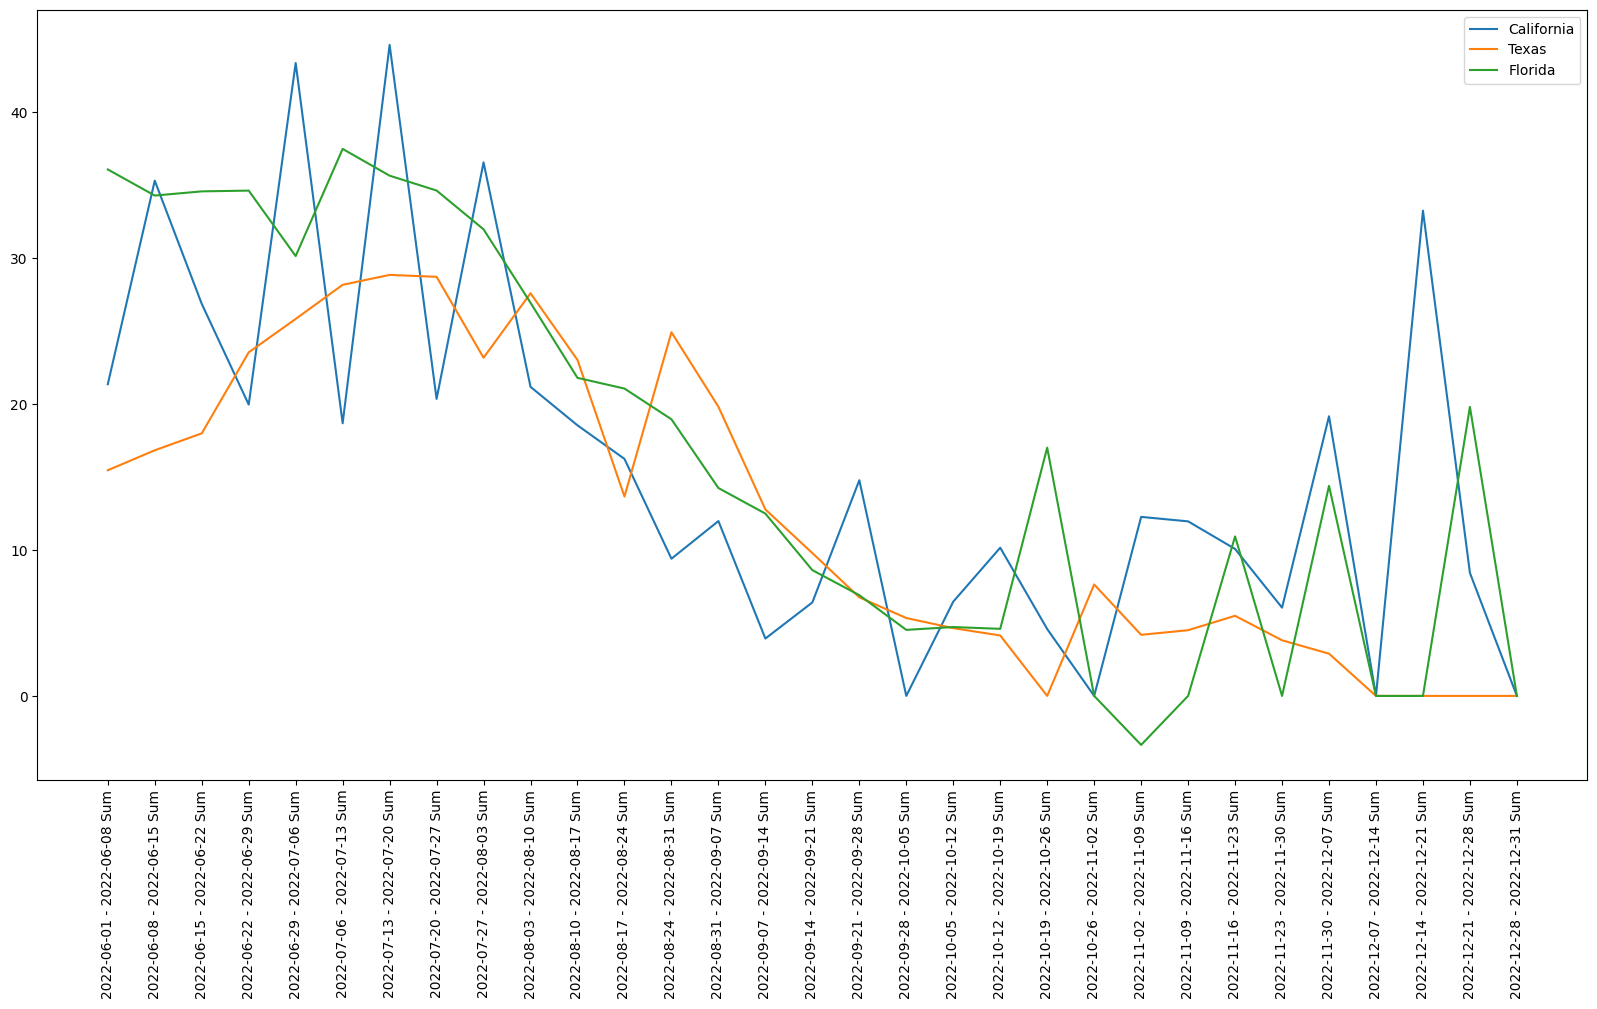

In [11]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20, 10))

#plt.plot(ny_normalized_cases.keys(), ny_normalized_cases.values(), label = 'New York')
plt.plot(ca_normalized_cases.keys(), ca_normalized_cases.values(), label = 'California')
plt.plot(tx_normalized_cases.keys(), tx_normalized_cases.values(), label = 'Texas')
plt.plot(fl_normalized_cases.keys(), fl_normalized_cases.values(), label = 'Florida')
plt.xticks(rotation=90)

plt.legend()
plt.show()

Here we see the confirmed cases between three states: Texas, California and Florida. We want to discuss why we see a difference in the rates between these three states. From the lines we can tell that the most prone to massive shifts in recorded cases is California, but they also have consistently the most cases out of the three states. The reason for these jumps in confirmed cases is that the state of California reports covid 19 cases every week and a half. Because of this staggered reporting basis, it could lead to more jumps in the data. However, California sees the most volatility not because it has a higher population than the other two states, but because out of the three shown it has the highest population density. It is going to be the most prone to higher rates of confirmed cases because of cities like Los Angeles, San Diego and San Jose.

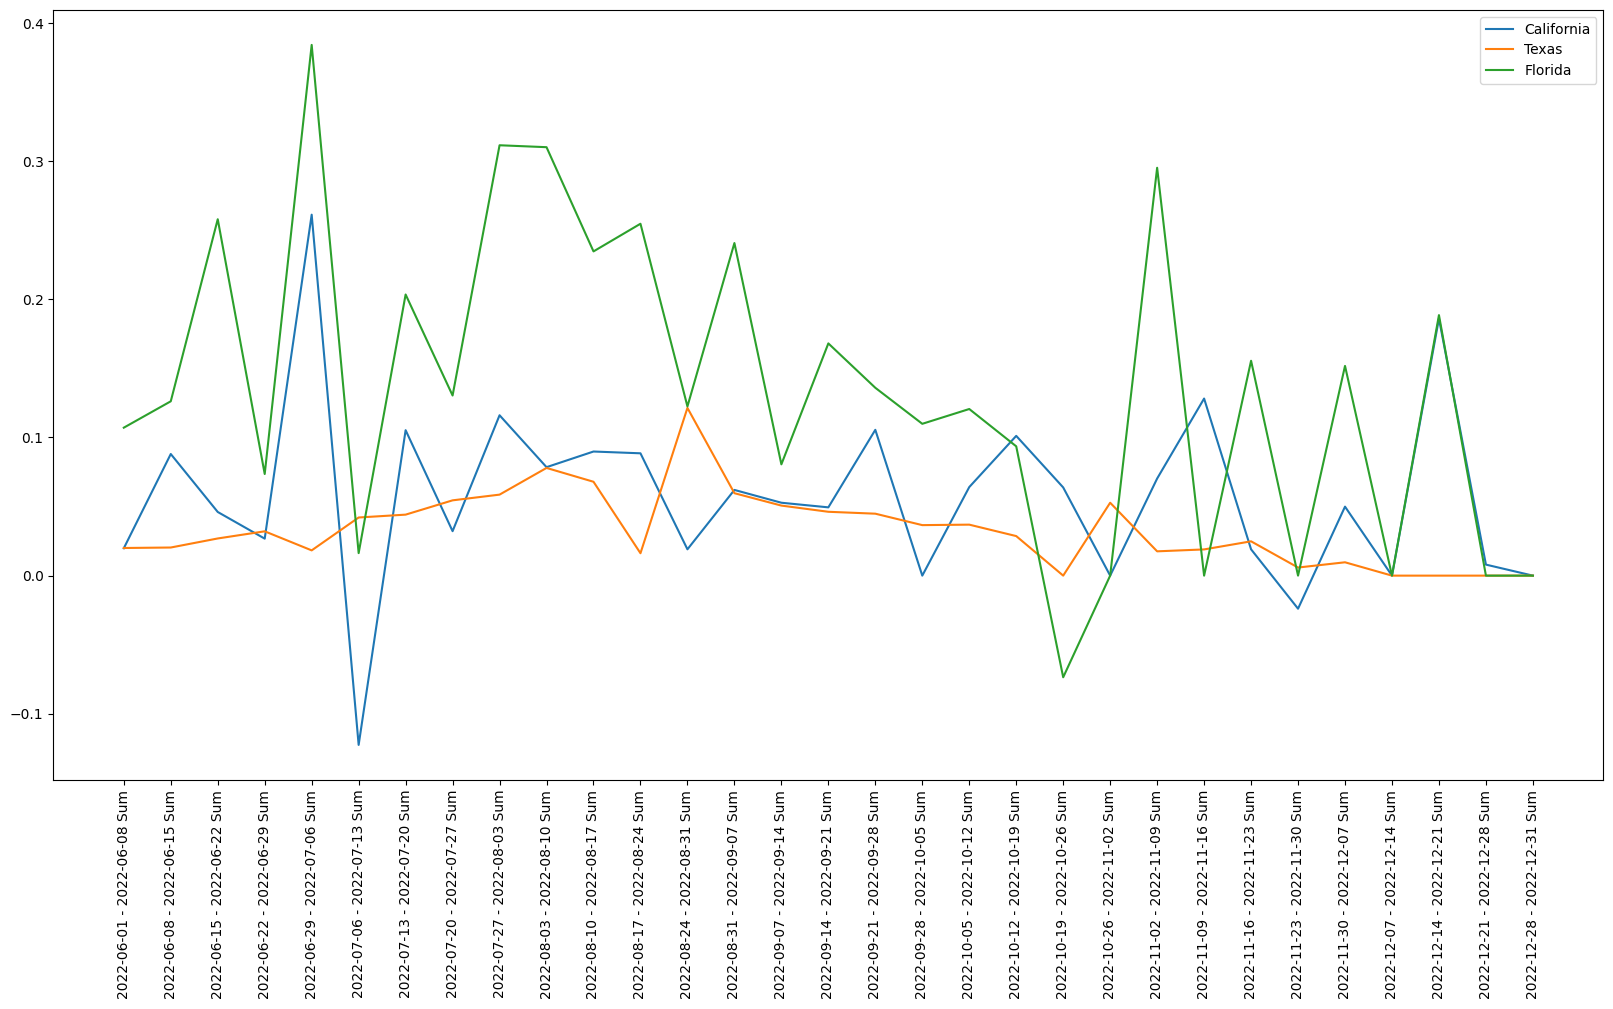

In [12]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20, 10))

#plt.plot(ny_normalized_deaths.keys(), ny_normalized_deaths.values(), label = 'New York')
plt.plot(ca_normalized_deaths.keys(), ca_normalized_deaths.values(), label = 'California')
plt.plot(tx_normalized_deaths.keys(), tx_normalized_deaths.values(), label = 'Texas')
plt.plot(fl_normalized_deaths.keys(), fl_normalized_deaths.values(), label = 'Florida')
plt.xticks(rotation=90)

plt.legend()
plt.show()

When it comes to deaths, interestingly, we see fairly volatile information. However, what we do notice is that Florida and California consistently have more reported deaths than Texas. One big reason why we might see more people dying in Florida and California is that more elderly men and women retire to those places. Elderly men and women are among those more susceptible and likely to have fatal interactions with the virus versus Texas which may have a lower population of elderly and immunocompromised individuals. This would also, in some part, explain some of the volatility we see in the data. This idea, combined with the fact of those two states having a higher population density, can lend itself well to Covid 19 being more fatal to Florida and California than Texas.

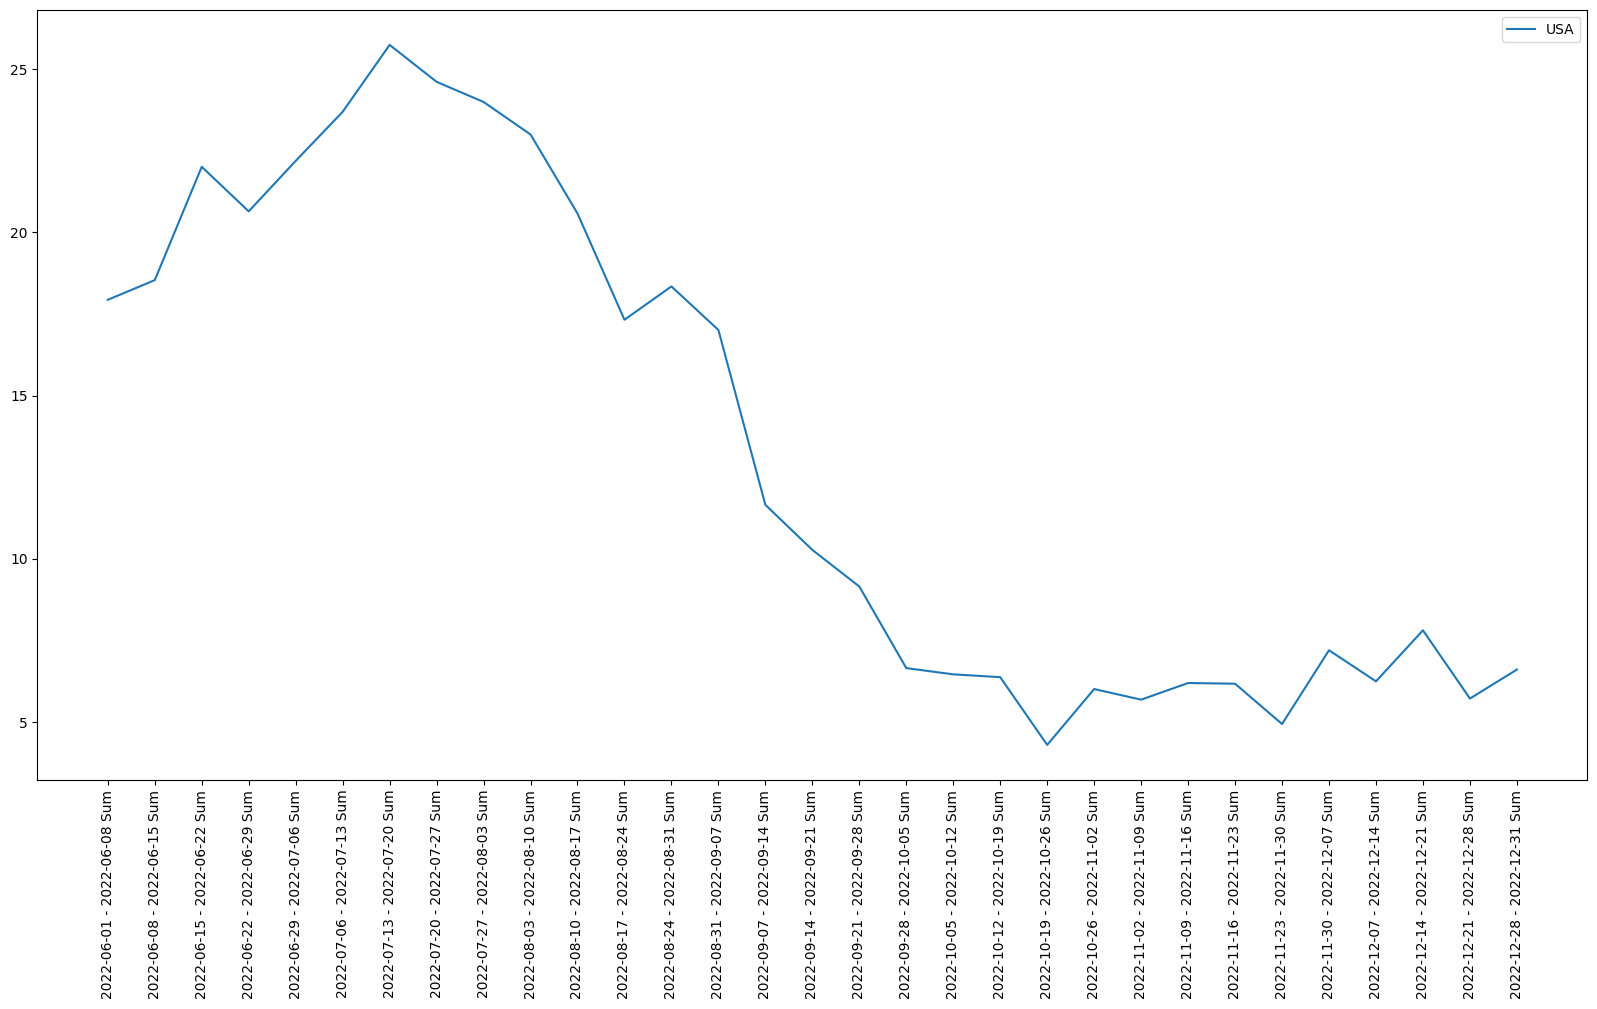

In [13]:
us_cases_normalized = normalization(confirmed)

plt.figure(figsize=(20, 10))
plt.plot(us_cases_normalized.keys(), us_cases_normalized.values(), label = 'USA')
plt.xticks(rotation=90)

plt.legend()
plt.show()

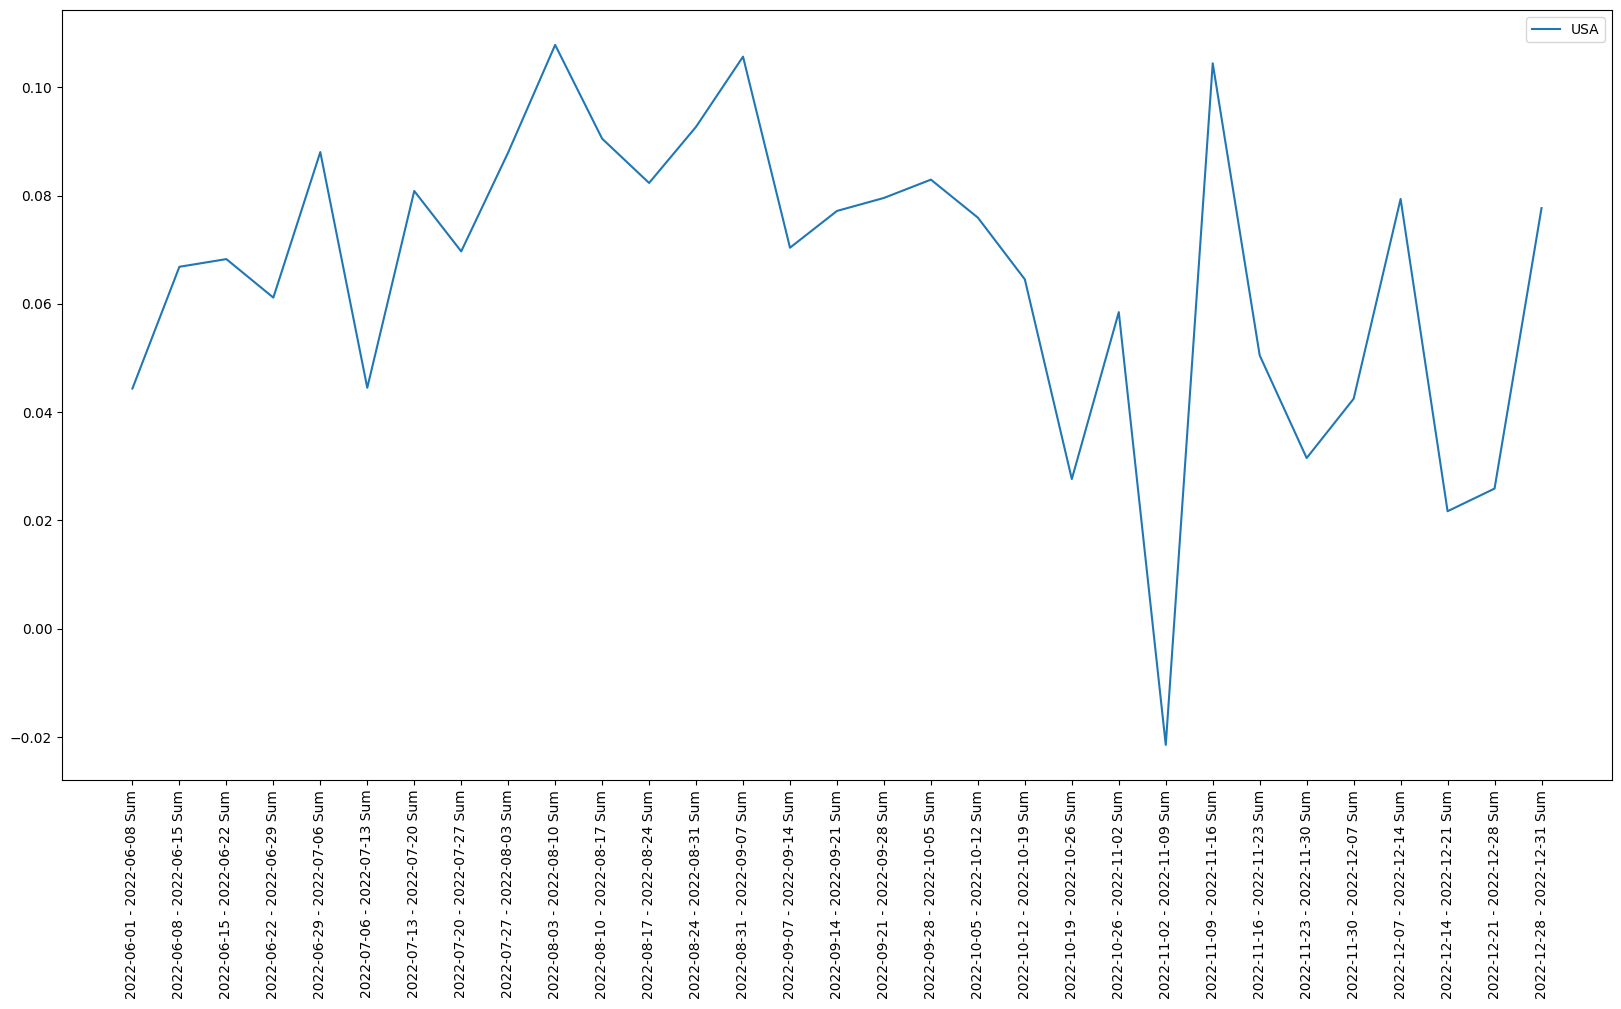

In [14]:
us_deaths_normalized = normalization(deaths)

plt.figure(figsize=(20, 10))
plt.plot(us_deaths_normalized.keys(), us_deaths_normalized.values(), label = 'USA')
plt.xticks(rotation=90)

plt.legend()
plt.show()

When we analyze this data and compare it to the US rates of cases and deaths, we see that generally the cases and deaths match in terms of their trends. Cases start high and then reduce approaching the end of the year with spikes approaching the holidays. 

In [15]:
#Identifying the top 3 counties in New York with high case and death rates based on population
county_sum_cases = ny_confirmed.groupby('County Name').sum()
county_sum_cases = county_sum_cases[county_sum_cases.columns.drop(list(county_sum_cases.filter(regex='Mean|Median|Mode')))]
county_sum_cases['county_sums'] = county_sum_cases.iloc[:, 0 : 33].sum(axis=1)
county_sum_cases

,countyFIPS,StateFIPS,2022-06-01 - 2022-06-08 Sum,2022-06-08 - 2022-06-15 Sum,2022-06-15 - 2022-06-22 Sum,2022-06-22 - 2022-06-29 Sum,2022-06-29 - 2022-07-06 Sum,2022-07-06 - 2022-07-13 Sum,2022-07-13 - 2022-07-20 Sum,2022-07-20 - 2022-07-27 Sum,...,2022-11-09 - 2022-11-16 Sum,2022-11-16 - 2022-11-23 Sum,2022-11-23 - 2022-11-30 Sum,2022-11-30 - 2022-12-07 Sum,2022-12-07 - 2022-12-14 Sum,2022-12-14 - 2022-12-21 Sum,2022-12-21 - 2022-12-28 Sum,2022-12-28 - 2022-12-31 Sum,population,county_sums
County Name,,,,,,,,,,,,,,,,,,,,,
Albany County,2304064,2304,35136,21248,18176,18688,19520,28224,29184,26496,...,14912,10048,13440,7104,16128,26624,0,23360,19453561,2999936
Allegany County,2304192,2304,1920,2048,1408,2368,1472,2176,1728,1728,...,1664,1024,2048,384,1792,2368,0,3392,19453561,2374208
Bronx County,2304320,2304,192000,164800,163904,159872,217920,305728,308992,231936,...,150016,151296,159744,91968,214784,365760,0,246784,19453561,7677568
Broome County,2304448,2304,13632,9408,7168,6720,8640,13376,12160,13376,...,10496,8576,9344,7552,13376,19648,0,18496,19453561,2749760
Cattaraugus County,2304576,2304,5632,4352,3392,2880,3776,3776,3840,3584,...,2752,2176,1856,960,1600,5632,0,4672,19453561,2453248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Washington County,2311360,2304,5568,4160,2560,2176,2496,4096,4160,2624,...,2432,2112,3648,1600,4480,7552,0,4800,19453561,2444288
Wayne County,2311488,2304,4096,3520,3264,3008,3456,6720,5248,4352,...,3648,2816,4224,1792,5376,7872,0,6592,19453561,2476032
Westchester County,2311616,2304,155008,129792,117376,111552,148672,177152,160320,120704,...,77440,86272,102272,49216,131008,230848,0,167168,19453561,5669120


In [16]:
county_sum_cases_partial = county_sum_cases.drop(county_sum_cases.columns[0 : 33], axis=1)
county_sum_cases_partial

,population,county_sums
County Name,,
Albany County,19453561,2999936
Allegany County,19453561,2374208
Bronx County,19453561,7677568
Broome County,19453561,2749760
Cattaraugus County,19453561,2453248
...,...,...
Washington County,19453561,2444288
Wayne County,19453561,2476032
Westchester County,19453561,5669120


In [17]:
# Calculate the ratio of confirmed cases to population
county_sum_cases_partial['cases_per_population'] = county_sum_cases_partial['county_sums'] / county_sum_cases_partial['population']

# Find the row(s) with the highest value(s) of the ratio
sorted_cases = county_sum_cases_partial.sort_values(by='cases_per_population', ascending=False)

# Select the first three rows of the sorted DataFrame
top_three_cases = sorted_cases.head(3)

# Print the top three rows
top_three_cases

,population,county_sums,cases_per_population
County Name,,,
Queens County,19453561,12194560,0.626855
Kings County,19453561,11667200,0.599746
New York County,19453561,9378496,0.482097


In [18]:
county_sum_deaths = ny_deaths.groupby('County Name').sum()
county_sum_deaths = county_sum_deaths[county_sum_deaths.columns.drop(list(county_sum_deaths.filter(regex='Mean|Median|Mode')))]
county_sum_deaths['county_sums'] = county_sum_deaths.iloc[:, 0 : 33].sum(axis=1)
county_sum_deaths

,countyFIPS,StateFIPS,2022-06-01 - 2022-06-08 Sum,2022-06-08 - 2022-06-15 Sum,2022-06-15 - 2022-06-22 Sum,2022-06-22 - 2022-06-29 Sum,2022-06-29 - 2022-07-06 Sum,2022-07-06 - 2022-07-13 Sum,2022-07-13 - 2022-07-20 Sum,2022-07-20 - 2022-07-27 Sum,...,2022-11-09 - 2022-11-16 Sum,2022-11-16 - 2022-11-23 Sum,2022-11-23 - 2022-11-30 Sum,2022-11-30 - 2022-12-07 Sum,2022-12-07 - 2022-12-14 Sum,2022-12-14 - 2022-12-21 Sum,2022-12-21 - 2022-12-28 Sum,2022-12-28 - 2022-12-31 Sum,population,county_sums
County Name,,,,,,,,,,,,,,,,,,,,,
Albany County,2304064,2304,0,192,64,128,0,0,128,64,...,384,128,192,0,64,128,320,128,19453561,2310016
Allegany County,2304192,2304,0,0,0,0,0,64,128,0,...,0,0,0,0,0,0,64,0,19453561,2307008
Bronx County,2304320,2304,768,1024,704,704,512,384,896,1024,...,192,448,1088,832,1472,1600,1088,2816,19453561,2343680
Broome County,2304448,2304,64,64,0,0,0,128,0,128,...,256,320,0,0,0,192,64,192,19453561,2310208
Cattaraugus County,2304576,2304,0,0,64,128,0,0,0,0,...,0,64,64,0,0,0,0,64,19453561,2308224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Washington County,2311360,2304,64,64,64,64,0,64,0,128,...,0,64,64,0,0,128,64,192,19453561,2314944
Wayne County,2311488,2304,128,128,0,64,64,0,0,128,...,64,0,0,0,0,0,0,0,19453561,2315200
Westchester County,2311616,2304,256,256,128,576,128,192,512,640,...,640,320,448,128,896,576,320,1088,19453561,2326720


In [19]:
county_sum_deaths_partial = county_sum_deaths.drop(county_sum_deaths.columns[0 : 33], axis=1)
county_sum_deaths_partial

,population,county_sums
County Name,,
Albany County,19453561,2310016
Allegany County,19453561,2307008
Bronx County,19453561,2343680
Broome County,19453561,2310208
Cattaraugus County,19453561,2308224
...,...,...
Washington County,19453561,2314944
Wayne County,19453561,2315200
Westchester County,19453561,2326720


In [20]:
# Calculate the ratio of confirmed deaths to population
county_sum_deaths_partial['deaths_per_population'] = county_sum_deaths_partial['county_sums'] / county_sum_deaths_partial['population']

# Find the rows with the highest value(s) of the ratio
sorted_deaths = county_sum_deaths_partial.sort_values(by='deaths_per_population', ascending=False)
top_three_deaths = sorted_deaths.head(3)

# Print the top three rows
top_three_deaths

,population,county_sums,deaths_per_population
County Name,,,
Queens County,19453561,2385408,0.122621
Kings County,19453561,2371456,0.121903
Bronx County,19453561,2343680,0.120476


In [21]:
top_three_counties_cases = ['Queens County', 'Kings County', 'New York County']

top_three_cases_df = ny_confirmed[ny_confirmed['County Name'].str.contains('|'.join(top_three_counties_cases))]
top_three_cases_df = top_three_cases_df[top_three_cases_df.columns.drop(list(top_three_cases_df.filter(regex='Mean|Median|Mode|population')))]
top_three_cases_df = top_three_cases_df.drop(columns=['countyFIPS', 'State', 'StateFIPS'])
top_three_cases_df = top_three_cases_df.groupby('County Name').mean().reset_index()
top_three_cases_df

,County Name,2022-06-01 - 2022-06-08 Sum,2022-06-08 - 2022-06-15 Sum,2022-06-15 - 2022-06-22 Sum,2022-06-22 - 2022-06-29 Sum,2022-06-29 - 2022-07-06 Sum,2022-07-06 - 2022-07-13 Sum,2022-07-13 - 2022-07-20 Sum,2022-07-20 - 2022-07-27 Sum,2022-07-27 - 2022-08-03 Sum,...,2022-10-26 - 2022-11-02 Sum,2022-11-02 - 2022-11-09 Sum,2022-11-09 - 2022-11-16 Sum,2022-11-16 - 2022-11-23 Sum,2022-11-23 - 2022-11-30 Sum,2022-11-30 - 2022-12-07 Sum,2022-12-07 - 2022-12-14 Sum,2022-12-14 - 2022-12-21 Sum,2022-12-21 - 2022-12-28 Sum,2022-12-28 - 2022-12-31 Sum
0,Kings County,6500,5476,5116,5209,6315,8023,8587,5766,7480,...,3722,4289,4085,4166,4477,2005,5592,9191,0,5995
1,New York County,5904,4615,4327,4130,5371,6915,6114,4326,5464,...,2684,3055,2816,2967,3051,1311,3669,6241,0,4178
2,Queens County,6570,5880,5350,5190,6595,8835,9107,6326,7957,...,3886,4411,4025,4154,4874,2129,5931,9495,0,6361


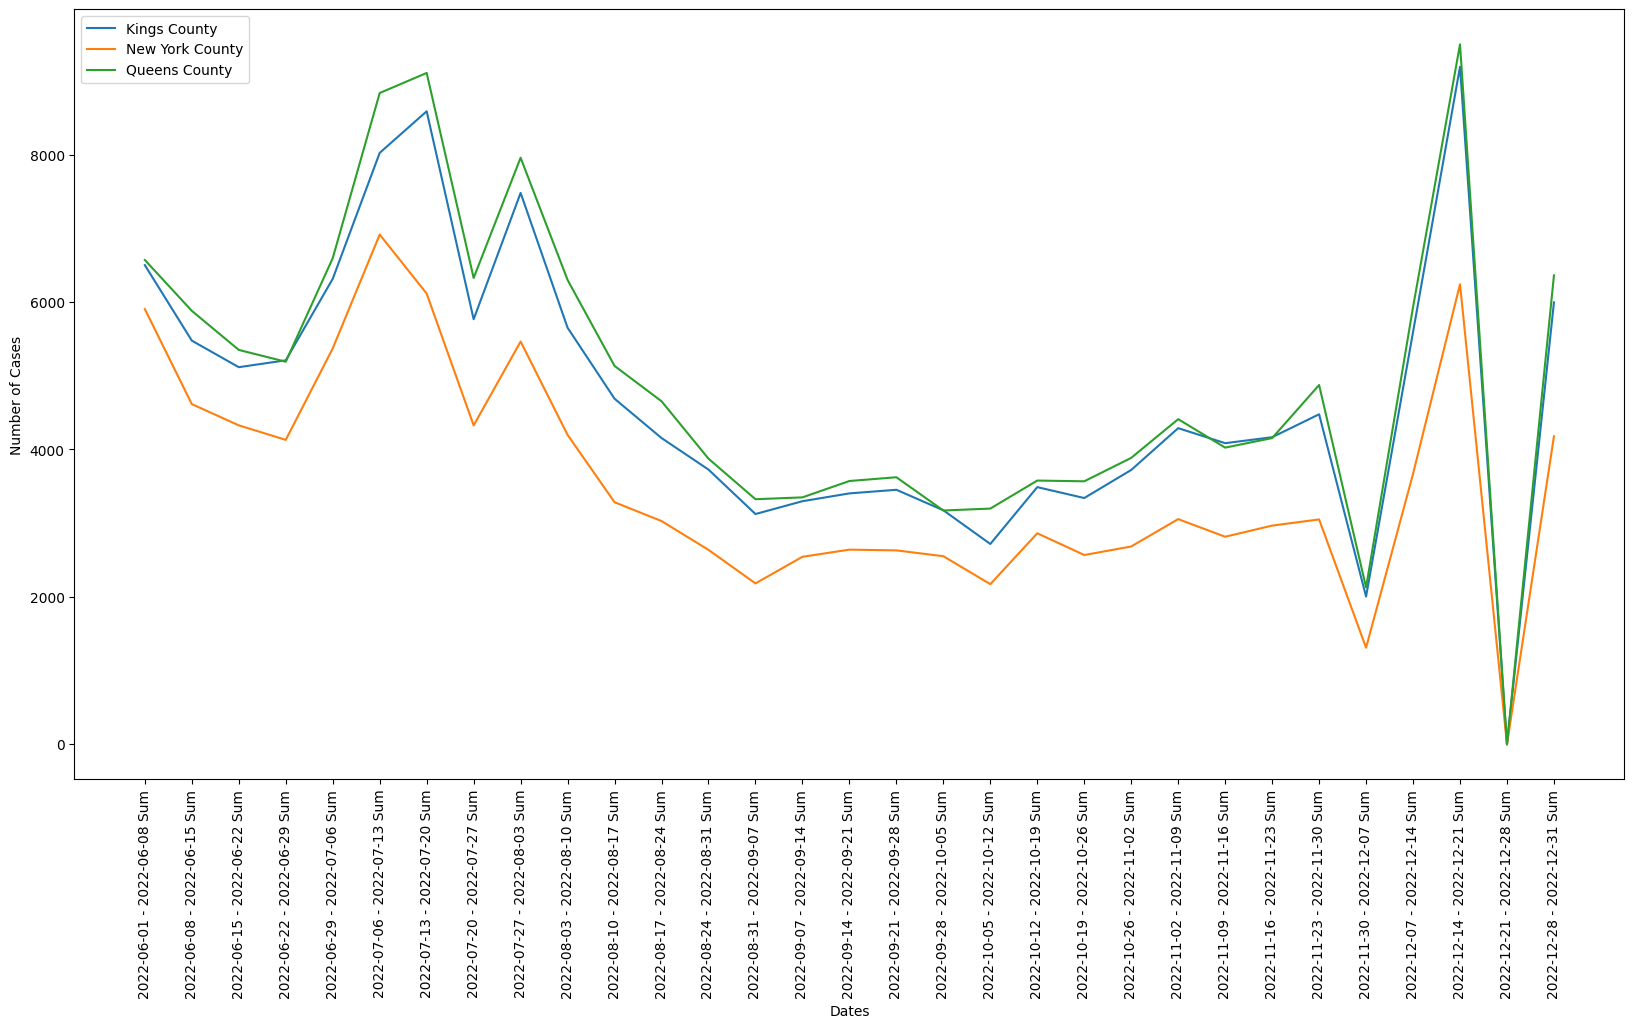

In [22]:
county_names = ['Kings County', 'New York County', 'Queens County']
dates = list(top_three_cases_df.columns[1:])
data = top_three_cases_df.values[:,1:]

plt.figure(figsize=(20, 10))
for i in range(3):
    plt.plot(dates, data[i,:], label=county_names[i])

plt.xlabel('Dates')
plt.ylabel('Number of Cases')
plt.legend()
plt.xticks(rotation=90)


plt.show()

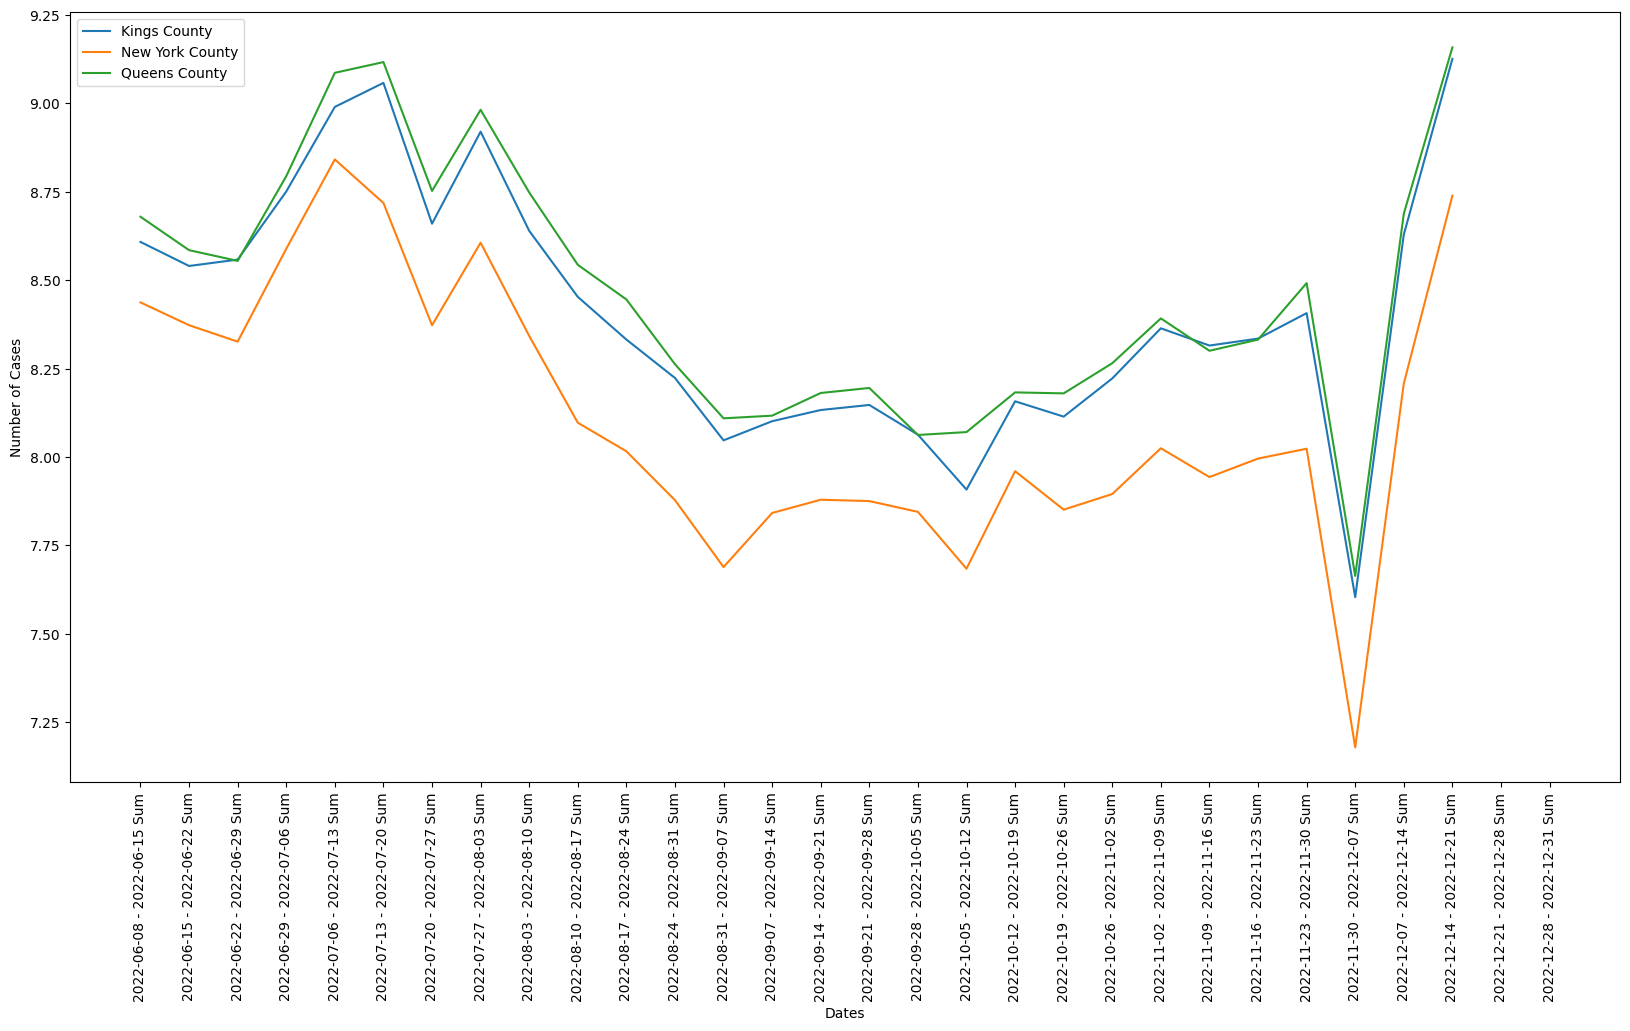

In [23]:
#Now taking the log normalized cases
top_three_cases_df_log = np.log(top_three_cases_df.iloc[:, 1:])

county_names = ['Kings County', 'New York County', 'Queens County']
dates = list(top_three_cases_df_log.columns[1:])
data = top_three_cases_df_log.values[:,1:]

plt.figure(figsize=(20, 10))
for i in range(3):
    plt.plot(dates, data[i,:], label=county_names[i])

plt.xlabel('Dates')
plt.ylabel('Number of Cases')
plt.legend()
plt.xticks(rotation=90)


plt.show()

Taking a look at the number of cases between the top three counties in New York, we can see that all of them are in the downtown area. There's no mystery as to why this could be, seeing as how they have the highest population density out of anywhere in New York. Analyzing the overall trends however, we want to see why there may be more cases in some of the higher case months of the year. In terms of this dataset, those times would be the last week of June to the last week of July. One possible explanation of this trend is that many people are getting out of the house to go on vacation or enjoy the summer weather. New York being quite cold in the winter, it makes for a perfect breeding ground for spread of the Coronavirus. More people being out of the house can lead to more people hanging out in groups, which can lead to spread of the virus.

We also see a massive uptick of infections towards the end of November into December. I feel a good explanation for this is simply reflected by the fact that more people are spending time with family for Thanksgiving and Christmas. More concentrated groups of families can lead to spreading events between people in the family, who then spread it to their immediate group of friends or extended family.

In [24]:
top_three_counties_deaths = ['Queens County', 'Kings County', 'Bronx County']

top_three_deaths_df = ny_confirmed[ny_confirmed['County Name'].str.contains('|'.join(top_three_counties_deaths))]
top_three_deaths_df = top_three_deaths_df[top_three_deaths_df.columns.drop(list(top_three_deaths_df.filter(regex='Mean|Median|Mode|population')))]
top_three_deaths_df = top_three_deaths_df.drop(columns=['countyFIPS', 'State', 'StateFIPS'])
top_three_deaths_df = top_three_deaths_df.groupby('County Name').mean().reset_index()
top_three_deaths_df

,County Name,2022-06-01 - 2022-06-08 Sum,2022-06-08 - 2022-06-15 Sum,2022-06-15 - 2022-06-22 Sum,2022-06-22 - 2022-06-29 Sum,2022-06-29 - 2022-07-06 Sum,2022-07-06 - 2022-07-13 Sum,2022-07-13 - 2022-07-20 Sum,2022-07-20 - 2022-07-27 Sum,2022-07-27 - 2022-08-03 Sum,...,2022-10-26 - 2022-11-02 Sum,2022-11-02 - 2022-11-09 Sum,2022-11-09 - 2022-11-16 Sum,2022-11-16 - 2022-11-23 Sum,2022-11-23 - 2022-11-30 Sum,2022-11-30 - 2022-12-07 Sum,2022-12-07 - 2022-12-14 Sum,2022-12-14 - 2022-12-21 Sum,2022-12-21 - 2022-12-28 Sum,2022-12-28 - 2022-12-31 Sum
0,Bronx County,3000,2575,2561,2498,3405,4777,4828,3624,4650,...,2131,2438,2344,2364,2496,1437,3356,5715,0,3856
1,Kings County,6500,5476,5116,5209,6315,8023,8587,5766,7480,...,3722,4289,4085,4166,4477,2005,5592,9191,0,5995
2,Queens County,6570,5880,5350,5190,6595,8835,9107,6326,7957,...,3886,4411,4025,4154,4874,2129,5931,9495,0,6361


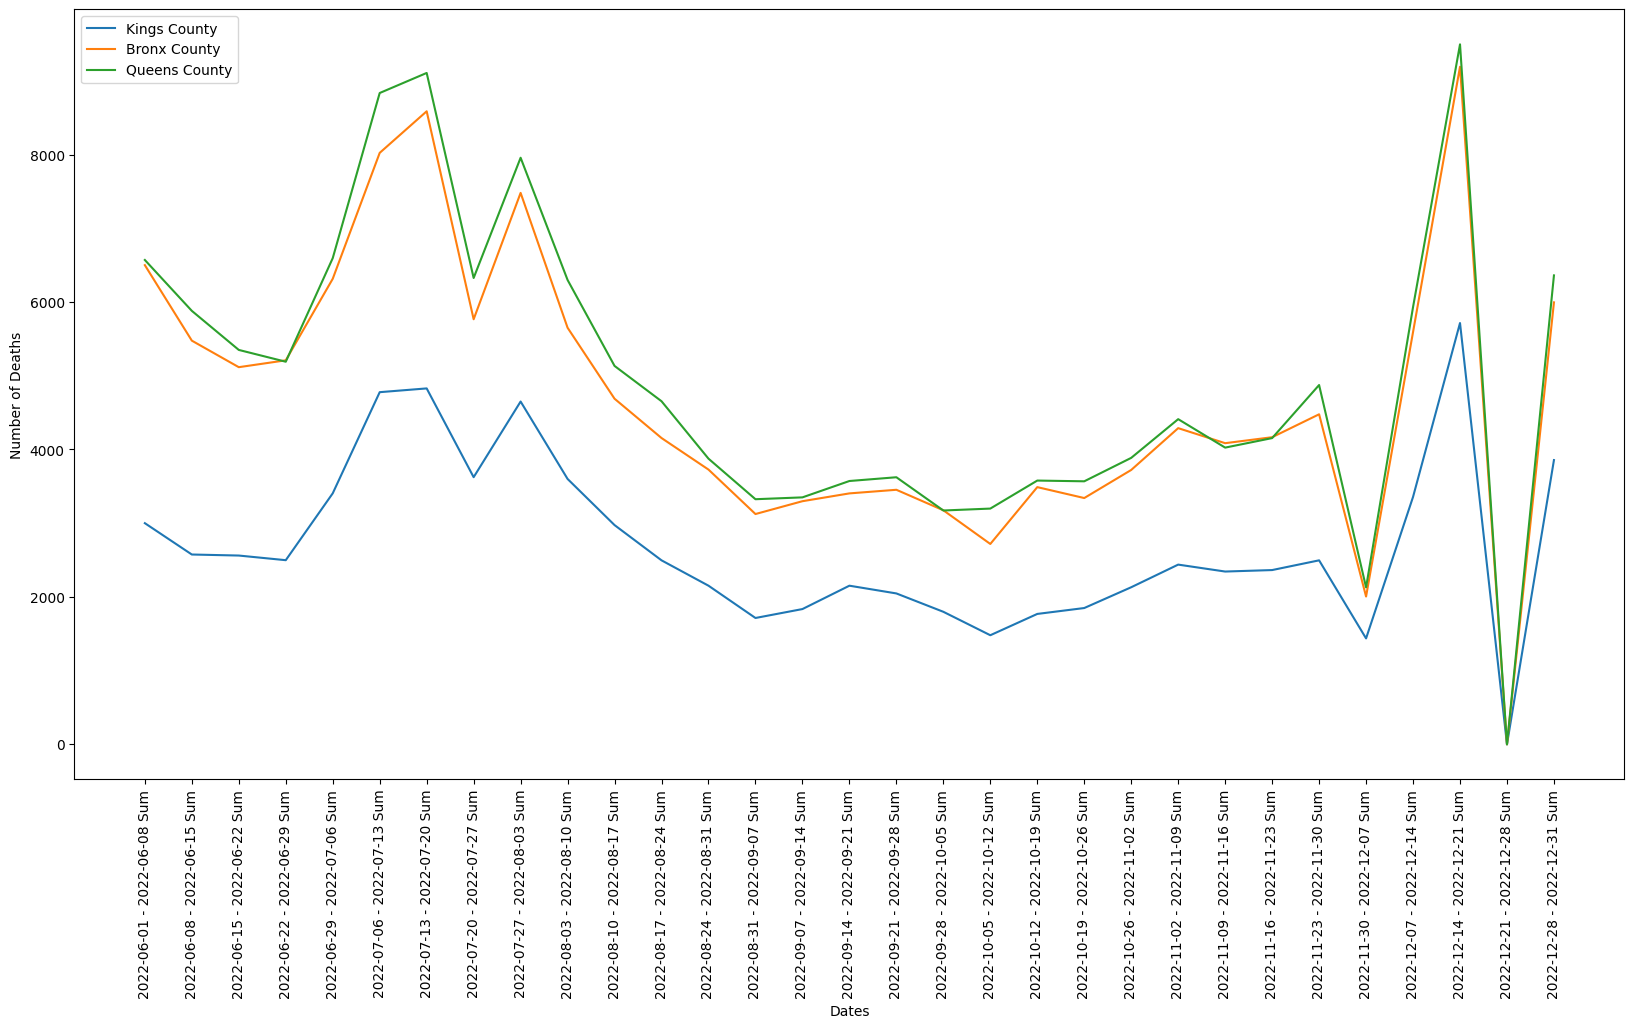

In [25]:
county_names = ['Kings County', 'Bronx County', 'Queens County']
dates = list(top_three_deaths_df.columns[1:])
data = top_three_deaths_df.values[:,1:]

plt.figure(figsize=(20, 10))
for i in range(3):
    plt.plot(dates, data[i,:], label=county_names[i])

plt.xlabel('Dates')
plt.ylabel('Number of Deaths')
plt.legend()
plt.xticks(rotation=90)


plt.show()

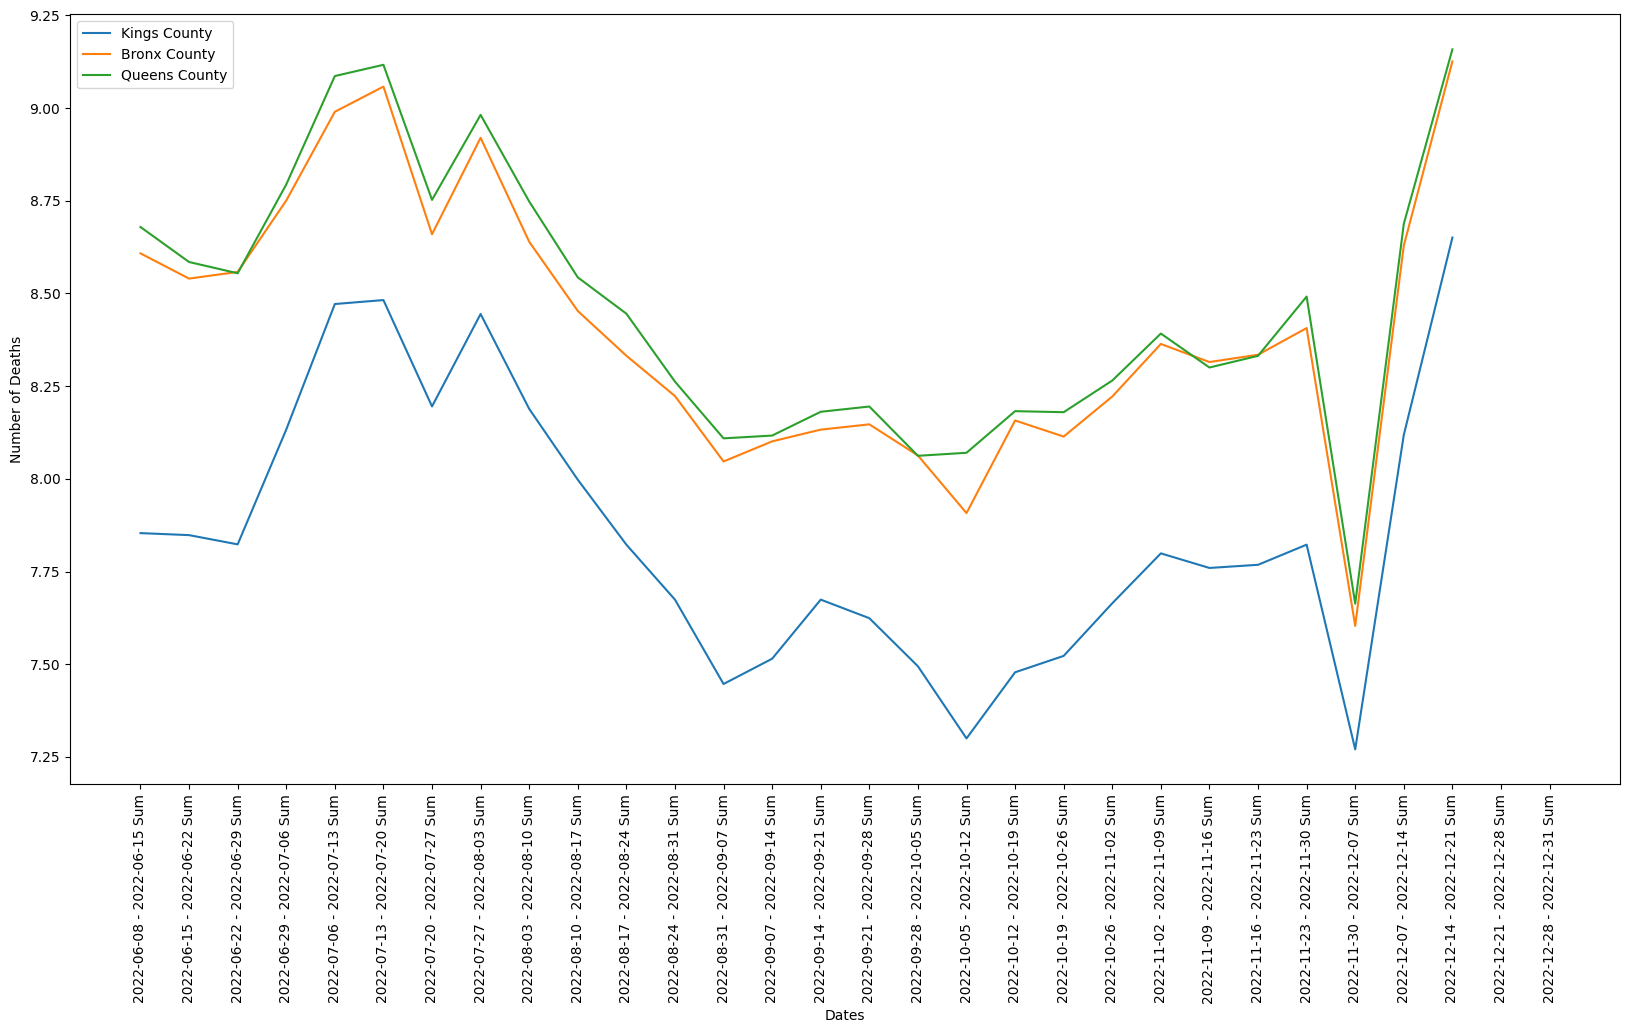

In [26]:
#Now taking the log normalized deaths
top_three_deaths_df_log = np.log(top_three_deaths_df.iloc[:, 1:])
county_names = ['Kings County', 'Bronx County', 'Queens County']
dates = list(top_three_deaths_df_log.columns[1:])
data = top_three_deaths_df_log.values[:,1:]

plt.figure(figsize=(20, 10))
for i in range(3):
    plt.plot(dates, data[i,:], label=county_names[i])

plt.xlabel('Dates')
plt.ylabel('Number of Deaths')
plt.legend()
plt.xticks(rotation=90)


plt.show()

Analyzing the deaths in the three given counties, we see similar trends as the infections. The peaks lie pretty solidly in the beginning of the summer months and into the holiday season as well. The reasons for this uptick in death is likely very similar as the analysis for the confirmed cases, there are more people going on vacation in the summer and more people spending time with family in the holiday season.

This is even further reinforced by the fact that more elderly men and women are taking part in these celebrations. They are the people who are more susceptible to the virus and for whom the virus can be more fatal.

Comparing the rate of cases and deaths in New York, we do see that the two datasets match up quite well. Although, it is worth noting that the rates of cases and deaths will be slightly different inside and outside of New York City. The population density in New York City lends itself well to the spread of the virus. Higher population density shows us higher rates of confirmed cases and deaths. I do feel, however, that most of these trends will likely be the same anywhere in the United States, and that these trends are not simply unique to New York.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c8b9407f-9b55-4516-885c-d1bc9453ac0b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>